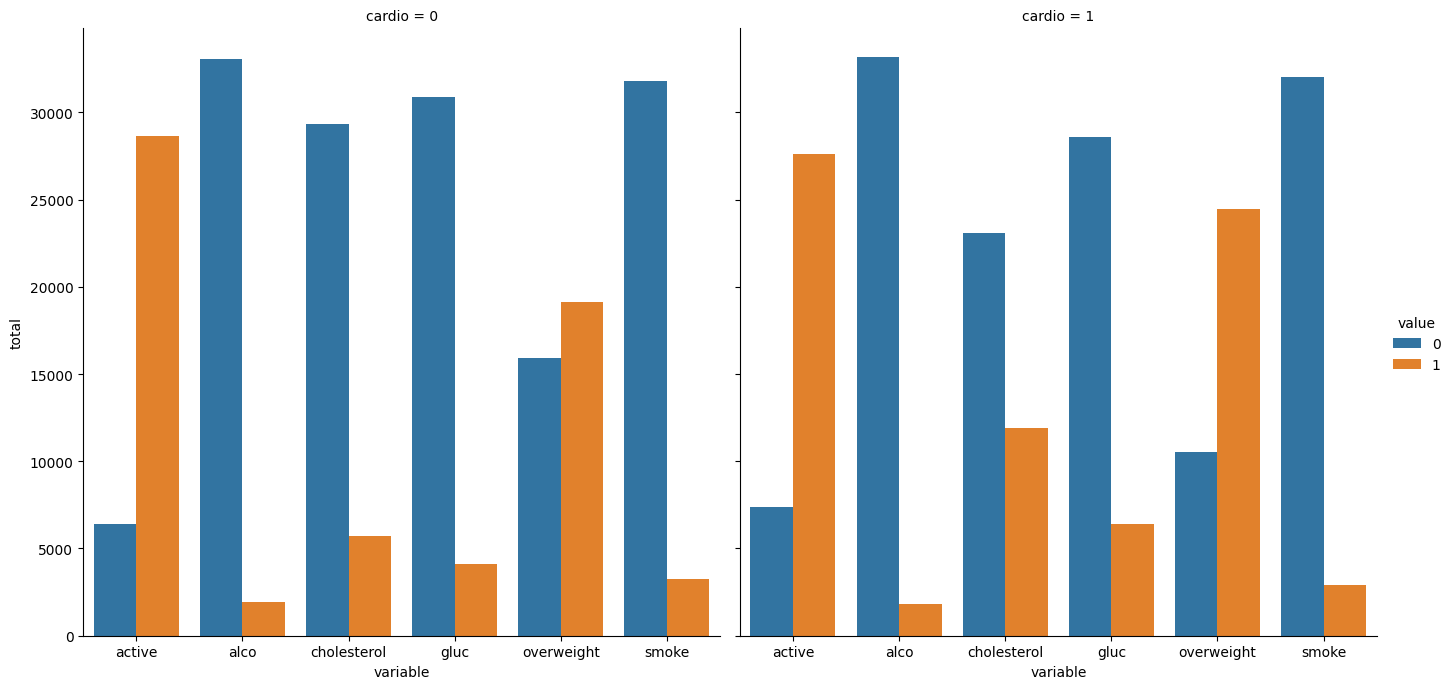

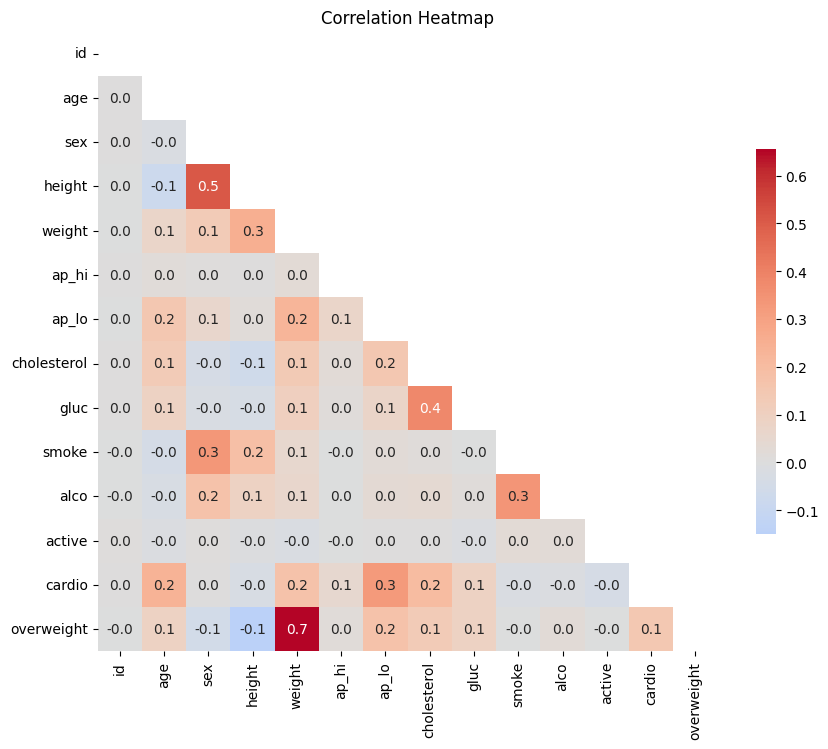

In [7]:
import pandas as pd  # Importing pandas for data manipulation
import seaborn as sns  # Importing seaborn for visualization
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import numpy as np  # Importing numpy for numerical operations

# === Load Data ===
df = pd.read_csv("medical_examination.csv")  # Reading the CSV file into a DataFrame
# Convert to binary based on boolean condition and cast to int

# === Calculate BMI and Identify Overweight ===
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2  # Calculating BMI based on weight and height
df['overweight'] = (df['BMI'] > 25).astype(int)  # Marking individuals as overweight if BMI > 25

# === Categorize Cholesterol and Glucose ===
df['cholesterol'] = (df['cholesterol'] >= 2).astype(int)  # Categorizing cholesterol: 1 if >= 2, else 0 (boolean Logic)
df['gluc'] = (df['gluc'] >= 2).astype(int) # Categorizing glucose: 1 if >= 2, else 0 (boolean Logic)

# === Draw Categorical Plot ===
def draw_cat_plot():
   
    # === Reshape Data ===
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])  # Reshaping the DataFrame to long format
   
    # === Group Data ===
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')  # Grouping by categories and counting occurrences
   
    # === Create Plot ===
    facetgrid = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar', height=7, aspect=1)  # Creating a categorical plot
    fig = facetgrid.fig  # Extracting the figure object from the seaborn plot
   
    # === Save Plot ===
    fig.savefig('catplot.png')  # Saving the plot as a PNG file
    return fig  # Returning the figure

# === Draw Heatmap ===
def draw_heat_map():
    
    # === Filter Data ===
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]  # Filtering data where blood pressure and weight/height are within valid ranges
    df_heat = df_heat.drop(columns=['BMI'])  # Dropping the BMI column for correlation analysis
    
    # === Calculate Correlation ===
    corr = df_heat.corr()  # Calculating the correlation matrix of the filtered data
    
    # === Create Mask ===
    mask = np.triu(np.ones_like(corr, dtype=bool))  # Creating a mask to display only the lower triangle of the correlation matrix
    
    # === Create Plot ===
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)  # Creating a subplot with a specific size and resolution
    ax.set_title("Correlation Heatmap")  # Setting the title of the heatmap
    ax.set_xlabel('Variable')  # Labeling the x-axis
    ax.set_ylabel('Variable')  # Labeling the y-axis
    
    # === Plot Heatmap ===
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.1f', ax=ax, center=0, square=True, cbar_kws=dict(shrink=0.5))  # Plotting the heatmap with the correlation data
    
    # === Save Plot ===
    fig.savefig('heatmap.png')  # Saving the heatmap as a PNG file
    return fig  # Returning the figure

# === Execute Plot Functions ===
draw_cat_plot()  # Calling the function to draw the categorical plot
draw_heat_map();  # Calling the function to draw the heatmap


## Medical Examination Data Analysis and Visualization

This project analyzes and visualizes health-related data from a medical examination dataset. It calculates key health metrics such as BMI, classifies individuals based on cholesterol and glucose levels, and creates visualizations to present the data insights.

### Data Source
The dataset `medical_examination.csv` contains health information of individuals, including:
- **weight**: The weight of the individual (in kilograms).
- **height**: The height of the individual (in centimeters).
- **cholesterol**: The cholesterol level of the individual (on a scale from 1 to 3).
- **gluc**: The glucose level of the individual (on a scale from 1 to 3).
- **active**: Whether the individual is physically active (binary: 1 for active, 0 for inactive).
- **alco**: Whether the individual consumes alcohol (binary: 1 for yes, 0 for no).
- **smoke**: Whether the individual smokes (binary: 1 for yes, 0 for no).
- **cardio**: Whether the individual has a cardiovascular disease (binary: 1 for yes, 0 for no).
- **ap_hi**: Systolic blood pressure.
- **ap_lo**: Diastolic blood pressure.

### Objective
- **Calculate BMI**: Use weight and height to calculate the Body Mass Index (BMI) and classify individuals as overweight if BMI > 25.
- **Classify Cholesterol and Glucose**: Categorize cholesterol and glucose levels into binary values based on predefined thresholds.
- **Visualize Data**: 
  - Create a categorical plot to display relationships between lifestyle factors and cardiovascular health.
  - Generate a heatmap to show the correlation between various health metrics.

### Methodology
1. **BMI Calculation & Overweight Classification**:  
   - BMI is calculated using the formula:
     \[
     \text{BMI} = \frac{\text{weight}}{(\text{height}/100)^2}
     \]
   - Overweight individuals are classified if BMI > 25 (binary: 1 for overweight, 0 otherwise).

2. **Cholesterol & Glucose Classification**:  
   - Cholesterol and glucose levels are categorized as `1` if the level is >= 2, otherwise `0`.

3. **Categorical Plot (`draw_cat_plot`)**:  
   - The function reshapes the dataset and groups it by **cardio** and other lifestyle variables (active, alco, cholesterol, gluc, overweight, smoke).
   - A bar plot is generated to visualize the distribution of these variables, showing how they relate to cardiovascular health.

4. **Heatmap (`draw_heat_map`)**:  
   - The dataset is filtered to remove outliers, ensuring valid data points (e.g., systolic < diastolic blood pressure, and valid height/weight).
   - A correlation matrix of the cleaned data is calculated and visualized as a heatmap to identify relationships between health variables.

### Output
- **Final Plots**:
   - **Categorical Plot**: A bar plot comparing lifestyle factors and cardiovascular health across different categories (saved as `catplot.png`).
   - **Heatmap**: A heatmap displaying the correlation matrix between various health metrics (saved as `heatmap.png`).

This analysis helps in understanding how lifestyle factors like smoking, alcohol consumption, and activity level correlate with cardiovascular health and how variables like cholesterol and glucose contribute to overall health.
